<a href="https://colab.research.google.com/github/AndreiMoraru123/Optimization/blob/main/NelderMead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore one of the very used optimization algorithms. 

More exactly, I will take you through the implemantation of **Nelder Mead**, also callled **Amoeba** or **Simplex**, names which will make sense, as you shall soon see

Then, we will take a short look of how the algorithm works when called from the built in function of **Scipy**

I am a colorful Amoeba, or maybe a nonlinear function landscape of level curvers, or maybe both?

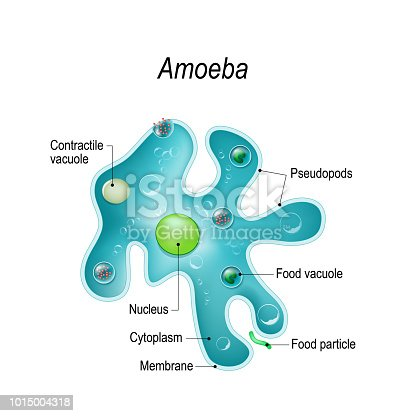

Imports

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon
from IPython.display import display, Math

Let's define a function and explore it's color map:

<IPython.core.display.Math object>

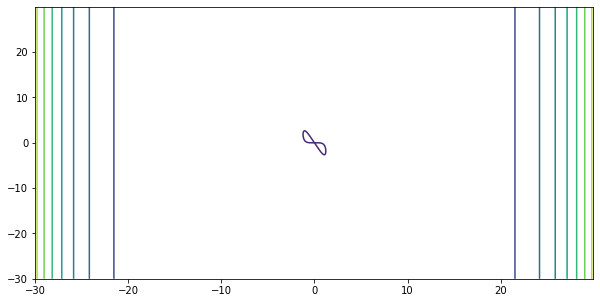

In [ ]:
def f(x):
    return x[0]**6 + 3*x[0]*x[1] + x[1]**2

display(Math(f' f(x1,x2) = x1^6 + 3x2x2 +x2^2'))

x = np.arange(-30,30,0.05)
y = np.arange(-30,30,0.05)
X, Y = np.meshgrid(x,y)
Z = f([X,Y])
fig, ax = plt.subplots(figsize = (10,5))
CS = ax.contour(X,Y,Z)

As you can see, on this domain two minima points can be seen. It's nice to have some a priori knowledge of your function before you minimize/maximize it numerically.

In [ ]:
def BGW(x1,x2,x3):
    triangle_sides = np.array([x1,x2,x3])
    triangle_values = np.array([(f(x1)),(f(x2)),(f(x3))])
    sorted_triangle = np.argsort(triangle_values)
    outs = [triangle_sides[i] for i in sorted_triangle]
    return outs[0],outs[1],outs[2]

def plot_contour(f):
    x = np.arange(-30,30,0.05)
    y = np.arange(-30,30,0.05)
    X, Y = np.meshgrid(x,y)
    Z = f([X,Y])
    fig, ax = plt.subplots(figsize = (10,5))
    CS = ax.contour(X,Y,Z)
    return 

def patch_triangle(s1,s2,s3):
    pts = np.array([s1,s2,s3])
    p = Polygon(pts,facecolor = 'None', edgecolor = 'red')
    ax = plt.gca()
    ax.add_patch(p)
    return

And now let's plot a first triangle:

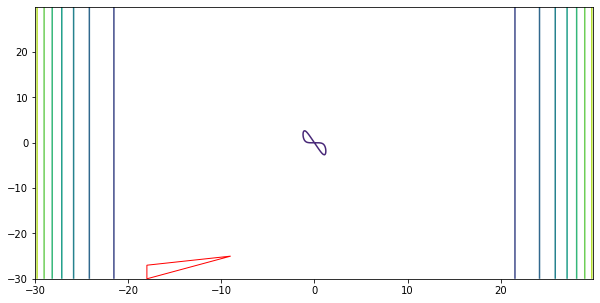

In [ ]:
s1 = [-18,-27] 
s2 = [-9, -25] 
s3 = [-18,-30]

B,G,W = BGW(s1,s2,s3)

plot_contour(f)
patch_triangle(B,G,W)

Now we shall expect to see triangles building up towards one of the minima points through either reflection or expansion and contract when they are getting further away from it

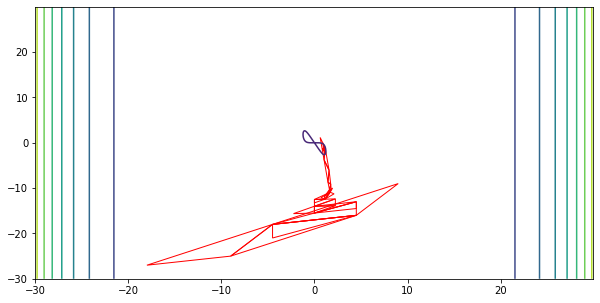

In [ ]:
plot_contour(f)

for i in range(100):
    M = (B+G)/2
    R = 2 * M - W

    if f(R) < f(W):

        E = 2*R - M

        if f(E) < f(R):
            W = E
        else:
            W = R
    else:

        C1 = (M + W) / 2
        C2 = (M + R) / 2

        if f(C1) < f(C2):
            C = C2
        else:
            C = C1

        if f(C) < f(W):
            W = C
        else:
            S = (B + W) / 2
            W = S
            G = M

    B,G,W = BGW(B,G,W)
    patch_triangle(B,G,W)

For 100 steps, the triangles got closer and closer until they 'chose' the minima on the right. Looks neat, but how does this solve real world problems?

Let's take a look into that:

This time we will work with real life data. More specifically: liver cancer data.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


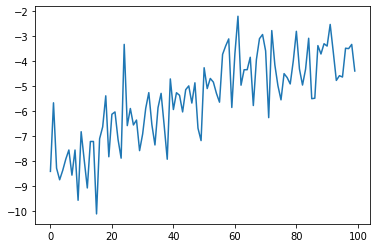

In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from google.colab import drive
drive.mount('/content/drive')

txt = '/content/drive/My Drive/trace3_37.mat'
data = sio.loadmat(txt)
val = data['val']
time = data['time']
t = len(val)

plt.plot(np.transpose(val))

The power of the Nelder Mead algorithm as well as minimization algorithms in general is really minimizing the error of some other function/approximation

In [ ]:
def error(x):
    txt = '/content/drive/My Drive/trace3_37.mat'
    data = sio.loadmat(txt)
    val = data['val']
    time = data['time']
    t = len(val)
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    mse = 0
    for i in range(t):
        fcn = x1 * np.exp(-x3 * time[i]) - x2
        mse = np.sum(np.square((val - fcn)))
    return mse

Here we call NM from within **scipy's** **fmin** optimization module and achieve the best approximation with minimal error

Optimization terminated successfully.
         Current function value: 104.820167
         Iterations: 296
         Function evaluations: 533


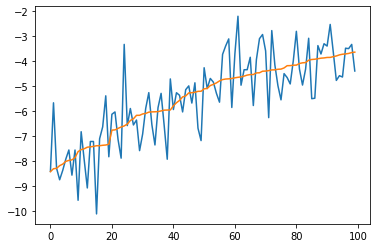

In [ ]:
xopt = scipy.optimize.fmin(error, np.array([0, 0, 0]))

x1 = xopt[0]
x2 = xopt[1]
x3 = xopt[2]
fun = []
for i in range(t):
    fcn = x1 * np.exp(-x3 * time[i]) - x2
    fun.append(fcn)
    
plt.plot(np.transpose(val))
plt.plot(np.transpose(fun))
plt.show()